# Post Modeling Visuals Based on Modeling Results

# Import Packages

In [1]:
import pandas as pd
import numpy as np

# Import Data

In [2]:
master_df = pd.read_csv("C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv")


C:\Users\johne\AppData\Local\Temp\ipykernel_9932\2529462873.py:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv("C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv")


# Data Cleaning (Same as Modeling)

In [3]:
# Cleaning the data by droppping columns that have any Colinearity or columns with slim to no data.

df_col_drop_lasso=master_df.drop(['ORDER_ID','PLANT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_2_MODIFIED', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIP_VALID_TO', 'EXECUTION_START_DATE',
                                   'EXECUTION_FINISH_DATE', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM', 'EQUIP_VALID_TO', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME'],axis=1)

# Dropping rows with NaN values that wont work within the lasso regression

df_filtered_lasso = df_col_drop_lasso.dropna(subset=['ORDER_DESCRIPTION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM','MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC', 'EQUIPMENT_ID'], how='all')

df_filtered_lasso.isnull().sum()/len(df_filtered_lasso)

PRODUCTION_LOCATION             0.000000
ACTUAL_WORK_IN_MINUTES          0.000000
MAINTENANCE_PLAN                0.477051
MAINTENANCE_ITEM                0.477051
MAINTENANCE_ACTIVITY_TYPE       0.000000
ORDER_DESCRIPTION               0.000096
MAINTENANCE_TYPE_DESCRIPTION    0.000000
FUNCTIONAL_LOC                  0.000045
EQUIPMENT_ID                    0.000000
EQUIPMENT_DESC                  0.727730
EQUIP_CAT_DESC                  0.727730
dtype: float64

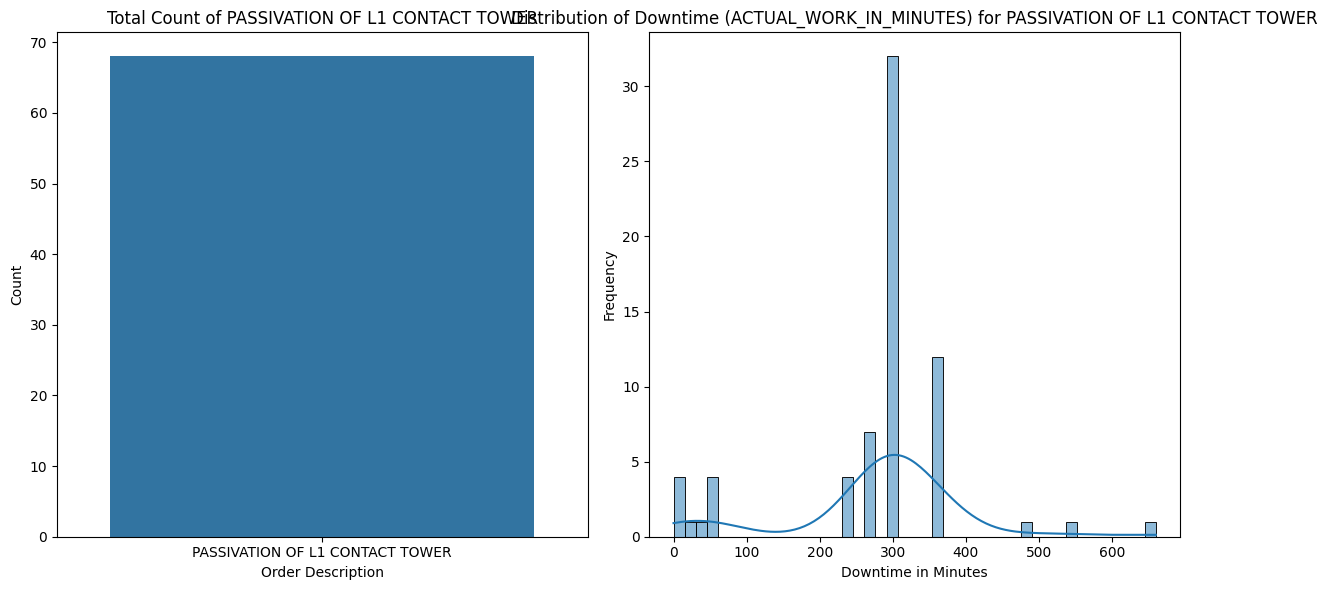

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the specific ORDER_DESCRIPTION
feature_name = "PASSIVATION OF L1 CONTACT TOWER"
df_feature = df_filtered_lasso[df_filtered_lasso['ORDER_DESCRIPTION'] == feature_name]

# Plotting
plt.figure(figsize=(12, 6))

# Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x='ORDER_DESCRIPTION', data=df_feature)
plt.title(f'Total Count of {feature_name}')
plt.xlabel('Order Description')
plt.ylabel('Count')

# Distribution Plot for Downtime (ACTUAL_WORK_IN_MINUTES)
plt.subplot(1, 2, 2)
sns.histplot(df_feature['ACTUAL_WORK_IN_MINUTES'], kde=True)
plt.title(f'Distribution of Downtime (ACTUAL_WORK_IN_MINUTES) for {feature_name}')
plt.xlabel('Downtime in Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


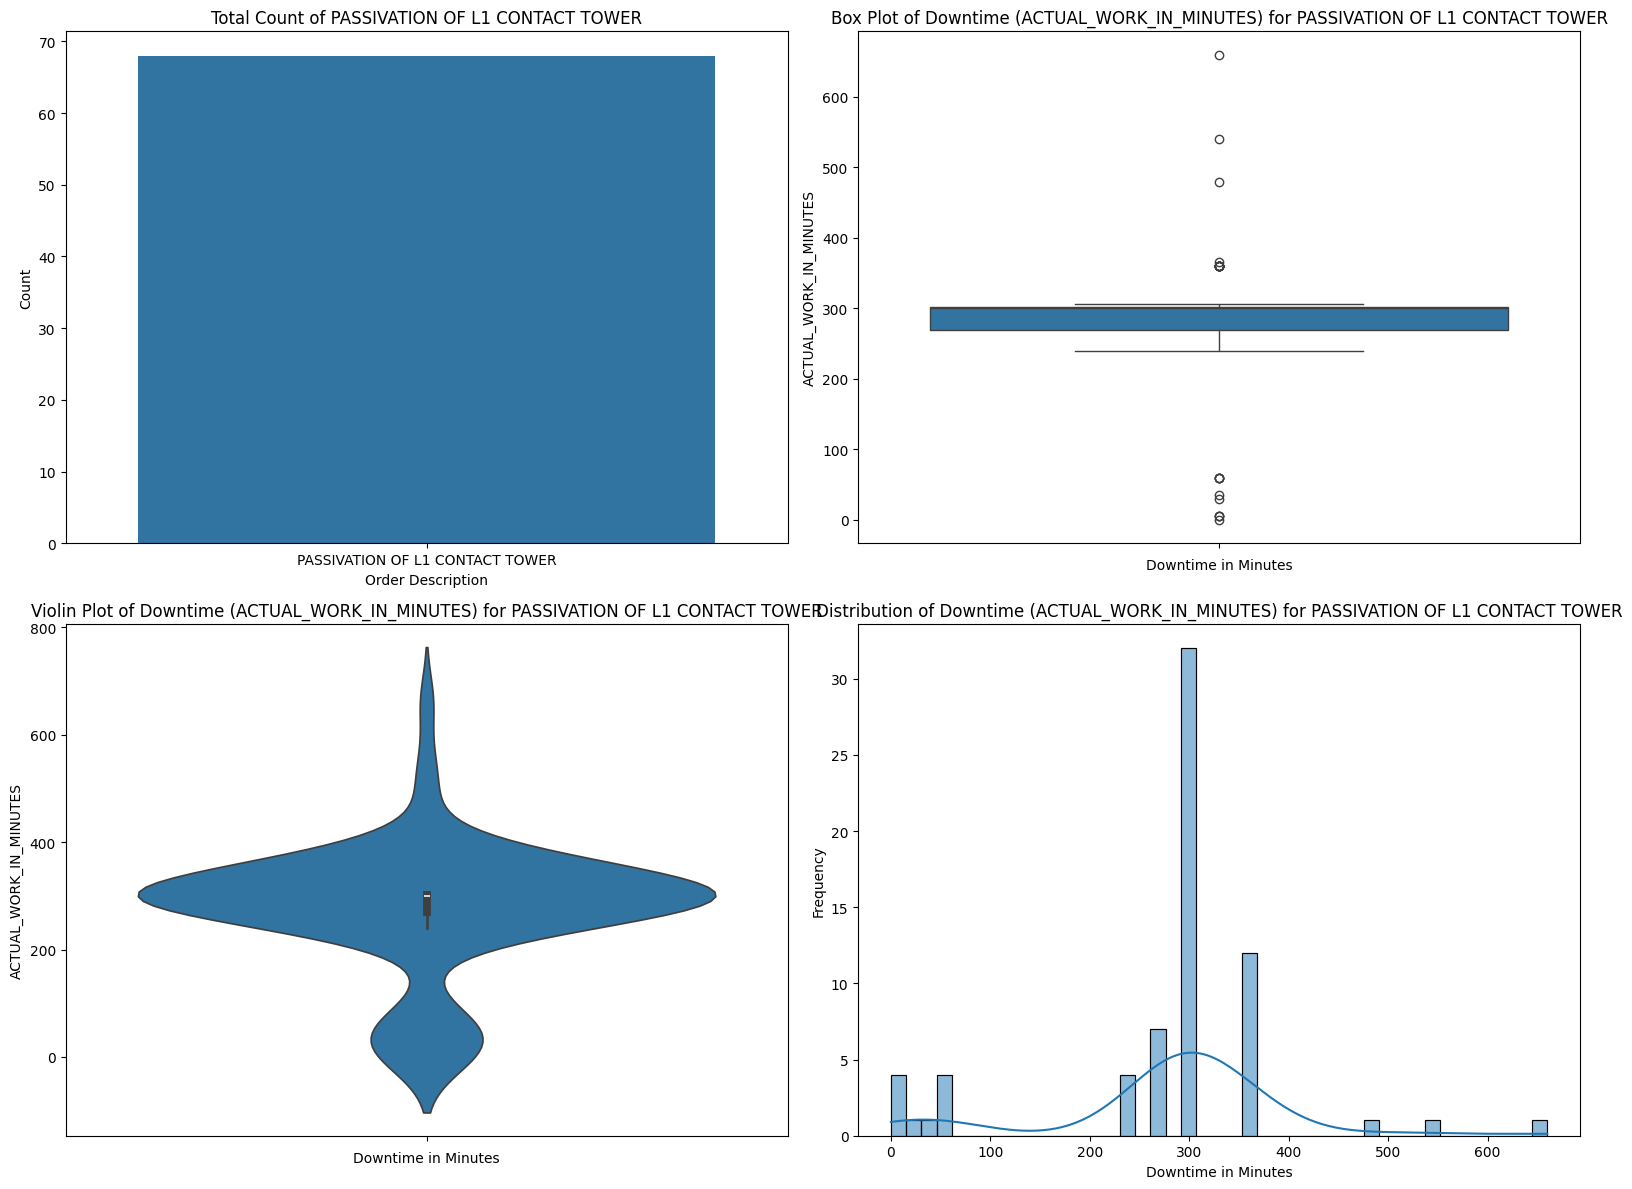

In [6]:
# Filter the dataset for the specific ORDER_DESCRIPTION
feature_name = "PASSIVATION OF L1 CONTACT TOWER"
df_feature = df_filtered_lasso[df_filtered_lasso['ORDER_DESCRIPTION'] == feature_name]

# Set up a figure with multiple subplots
plt.figure(figsize=(16, 12))

# Count Plot
plt.subplot(2, 2, 1)
sns.countplot(x='ORDER_DESCRIPTION', data=df_feature)
plt.title(f'Total Count of {feature_name}')
plt.xlabel('Order Description')
plt.ylabel('Count')

# Box Plot for Downtime (ACTUAL_WORK_IN_MINUTES)
plt.subplot(2, 2, 2)
sns.boxplot(y=df_feature['ACTUAL_WORK_IN_MINUTES'])
plt.title(f'Box Plot of Downtime (ACTUAL_WORK_IN_MINUTES) for {feature_name}')
plt.xlabel('Downtime in Minutes')

# Violin Plot for Downtime
plt.subplot(2, 2, 3)
sns.violinplot(y=df_feature['ACTUAL_WORK_IN_MINUTES'])
plt.title(f'Violin Plot of Downtime (ACTUAL_WORK_IN_MINUTES) for {feature_name}')
plt.xlabel('Downtime in Minutes')

# Histogram with KDE for Downtime
plt.subplot(2, 2, 4)
sns.histplot(df_feature['ACTUAL_WORK_IN_MINUTES'], kde=True)
plt.title(f'Distribution of Downtime (ACTUAL_WORK_IN_MINUTES) for {feature_name}')
plt.xlabel('Downtime in Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


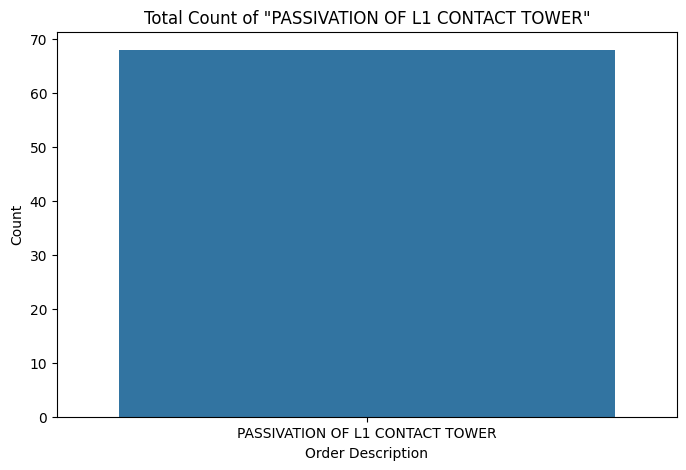

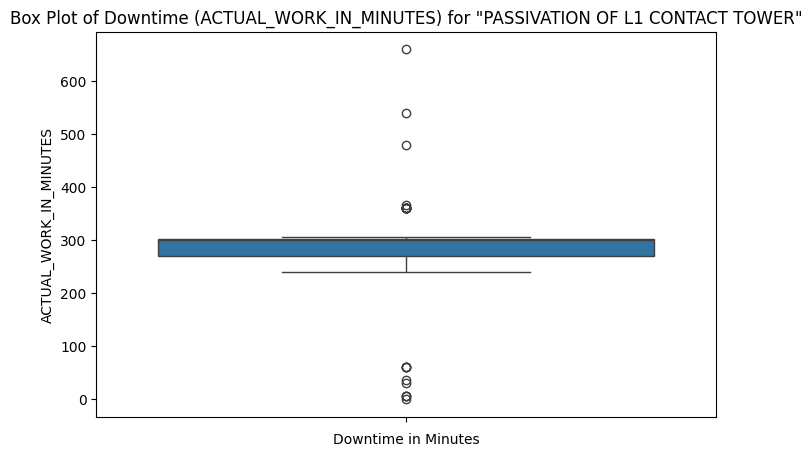

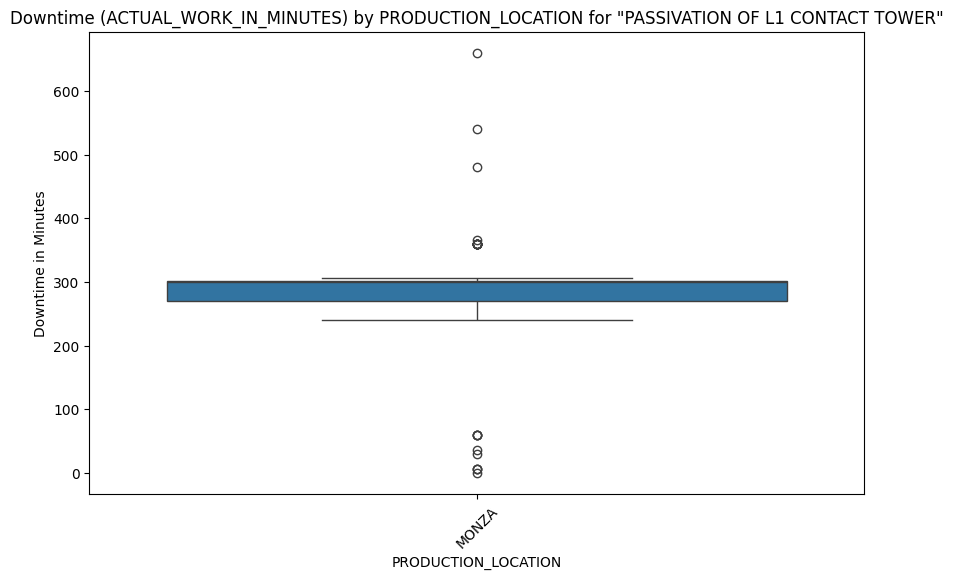

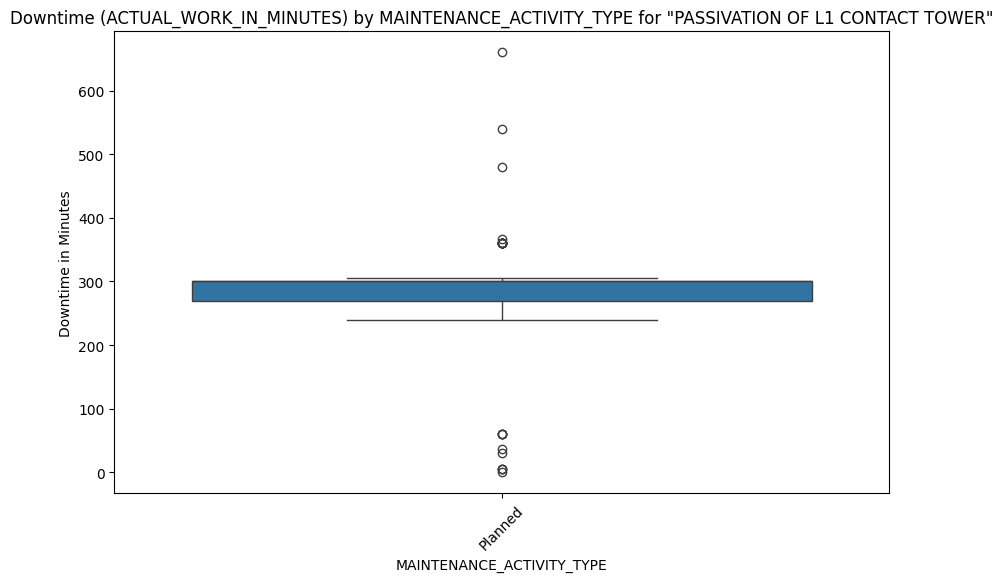

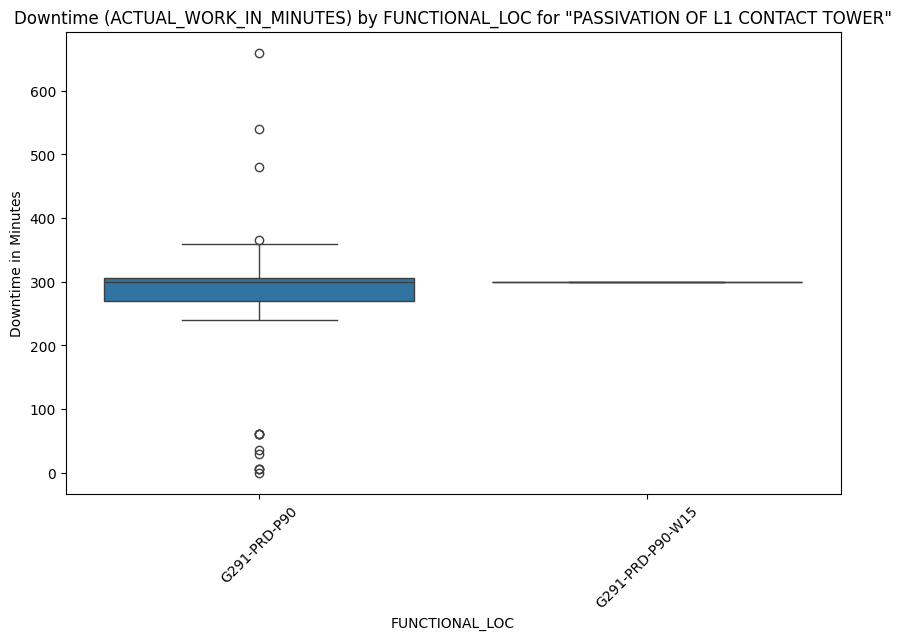

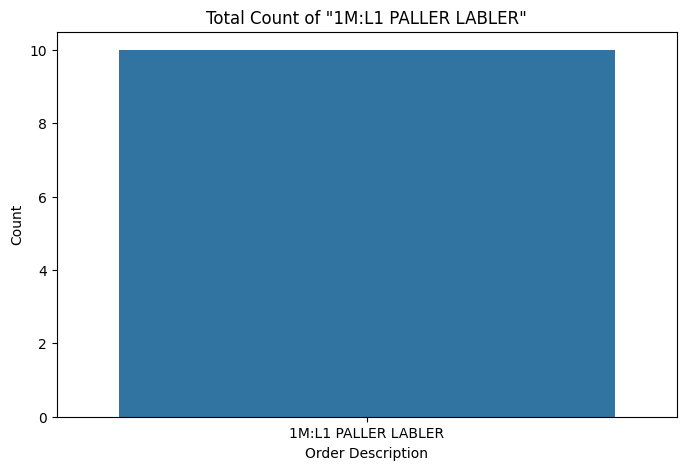

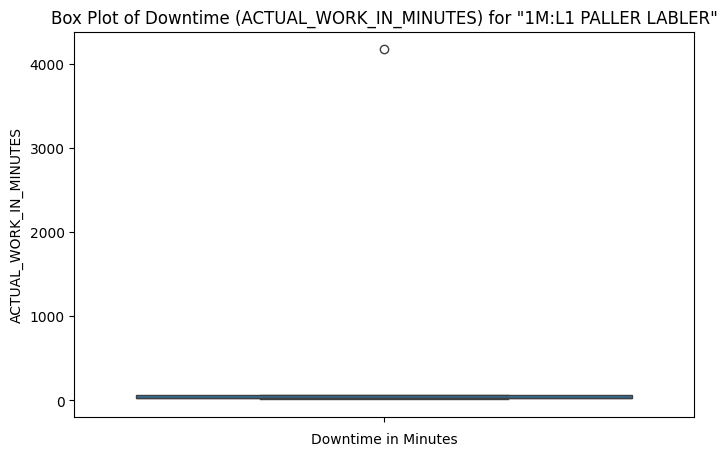

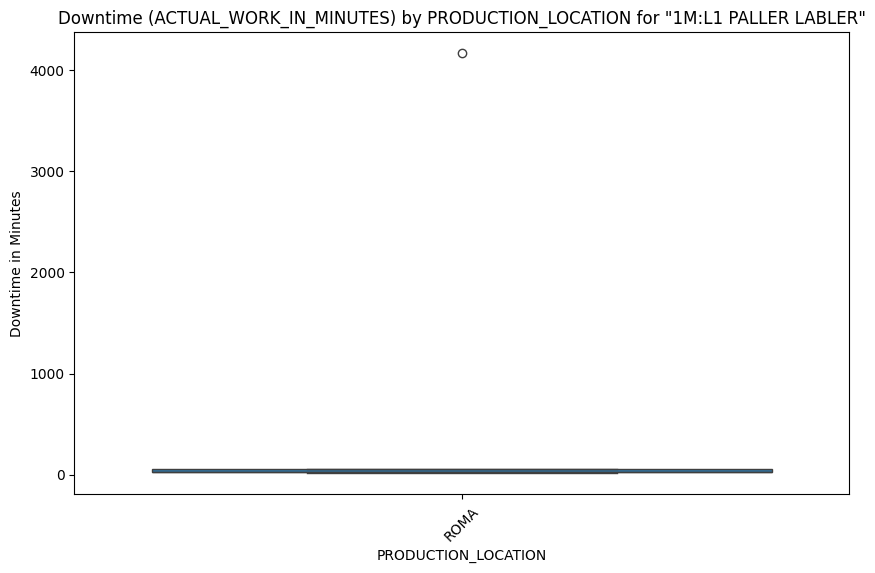

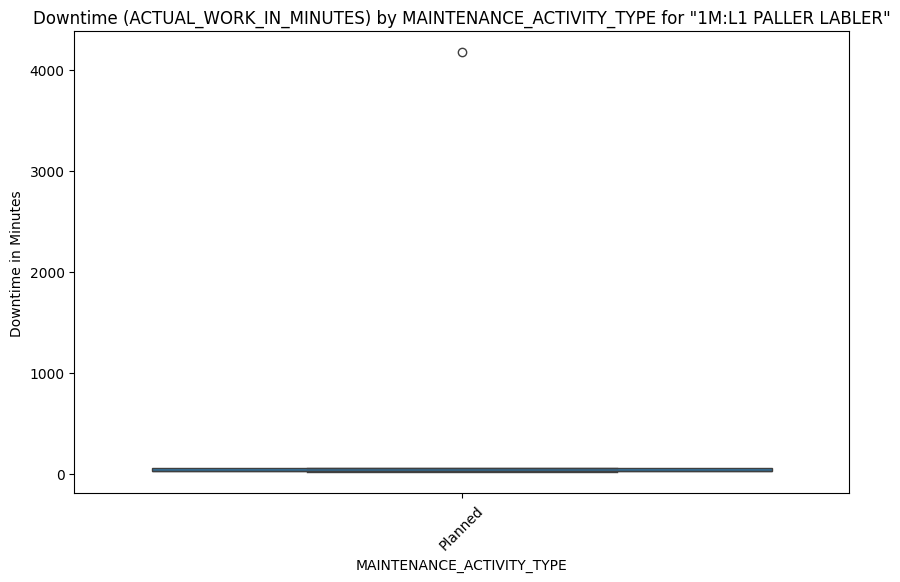

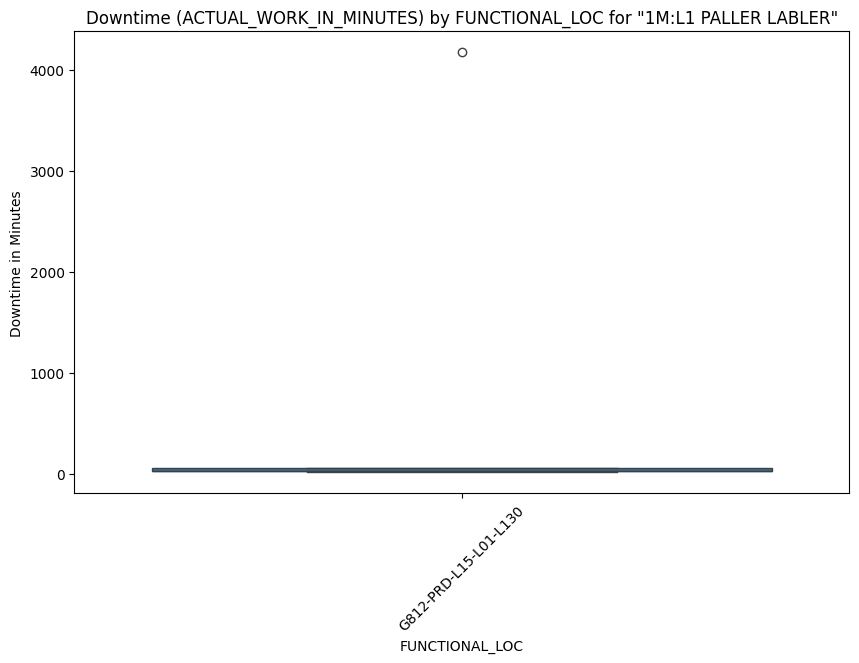

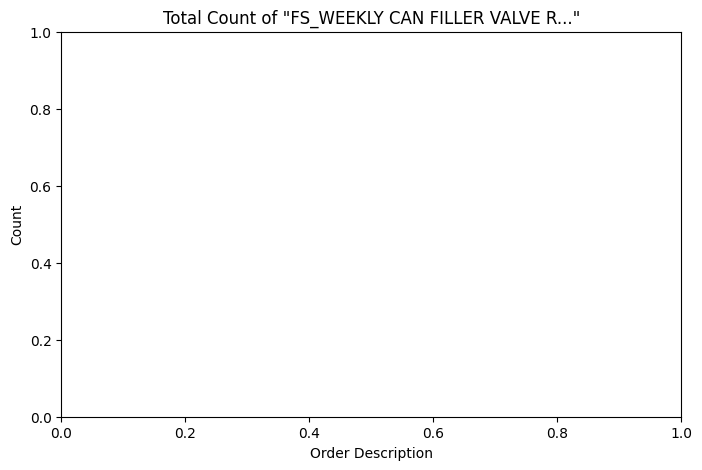

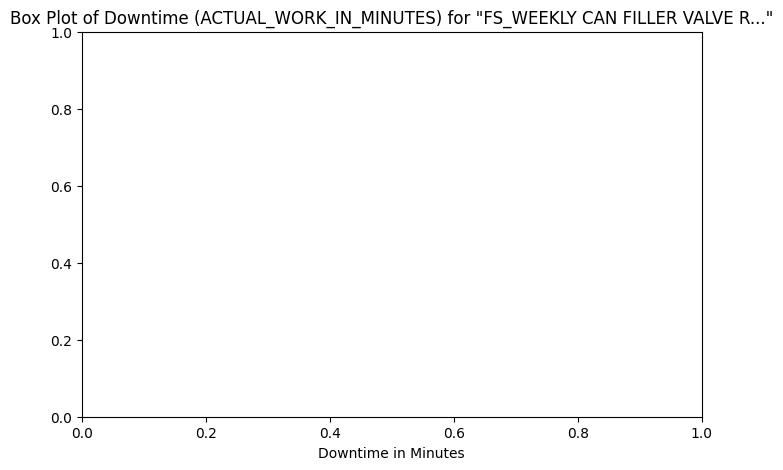

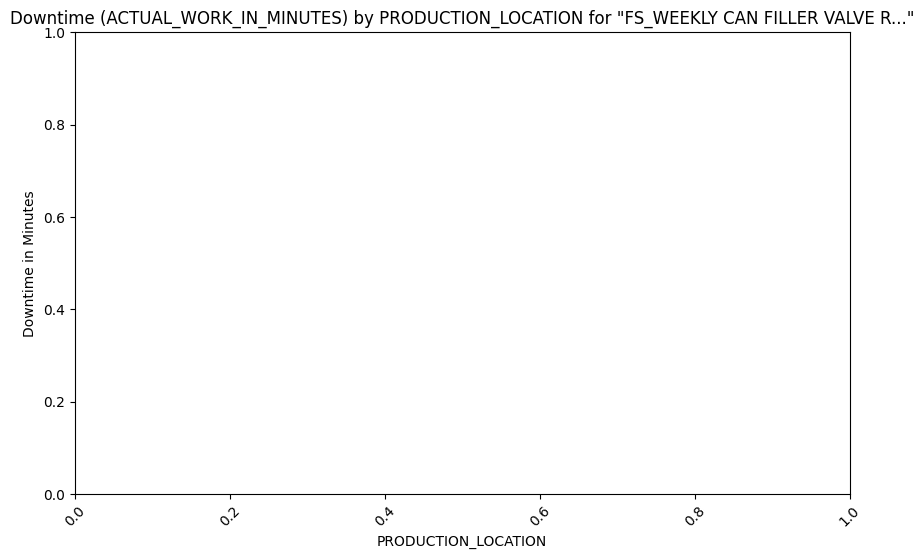

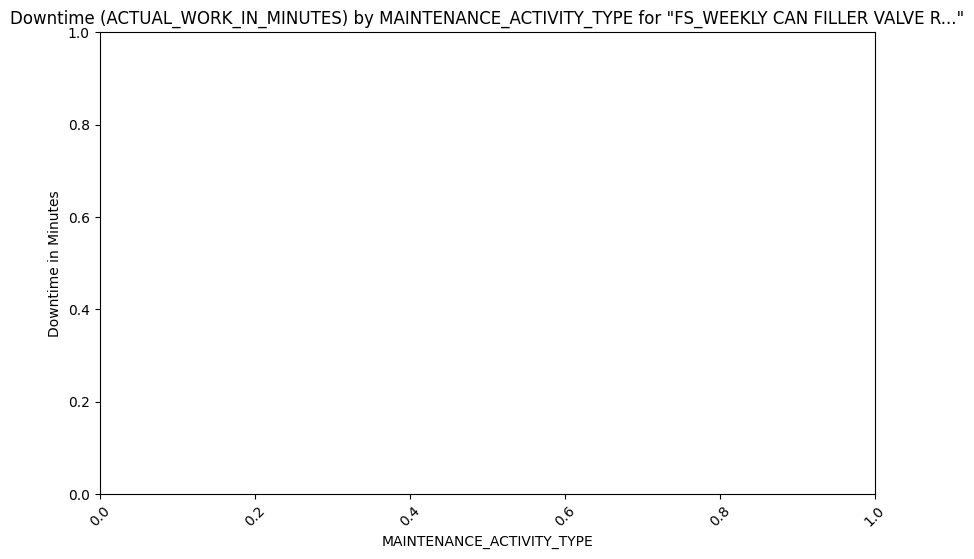

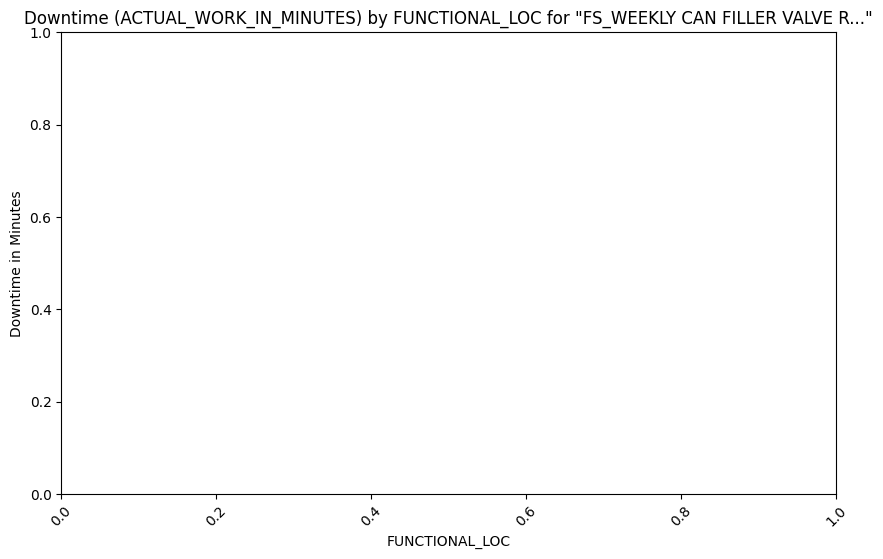

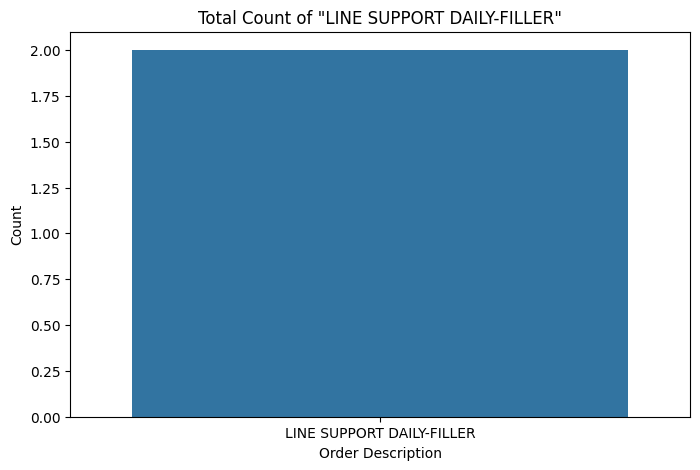

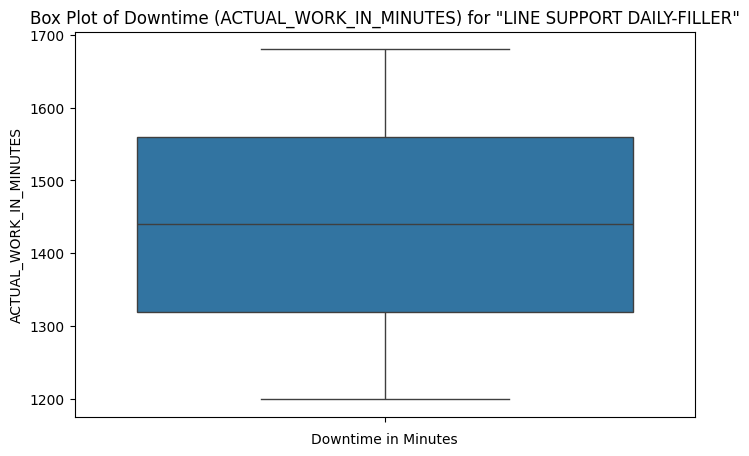

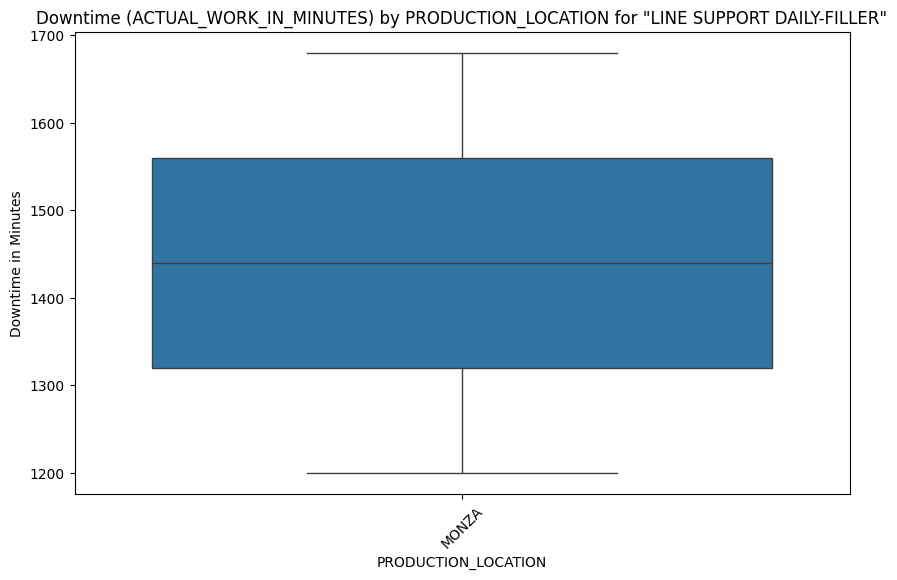

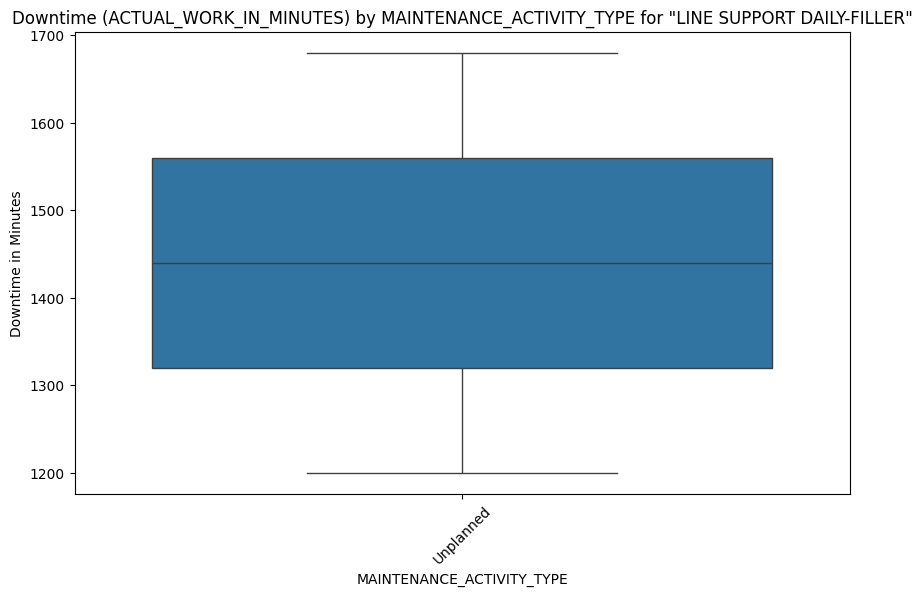

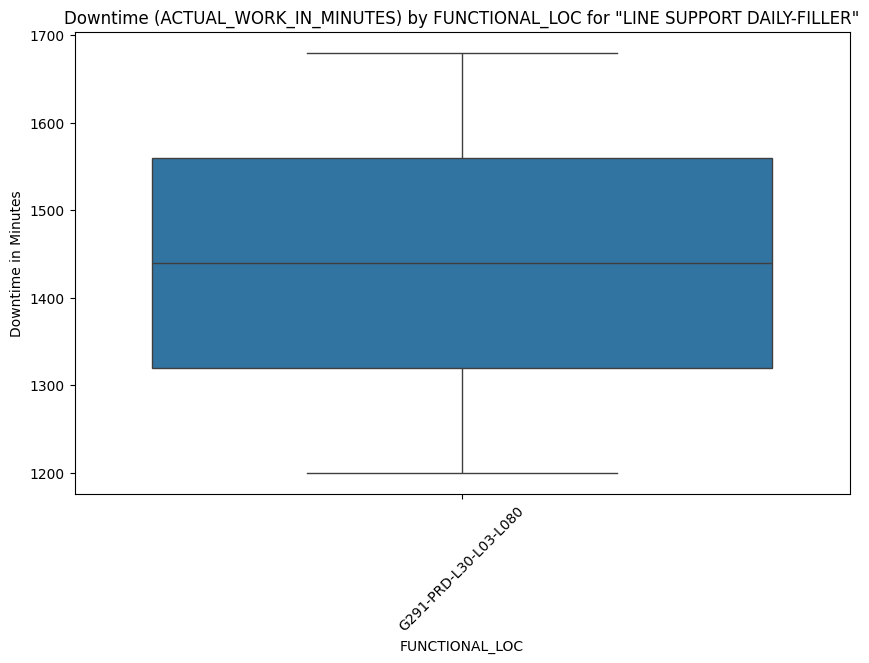

In [7]:
# List of important ORDER_DESCRIPTION values based on the lasso model
important_order_descriptions = [
    "PASSIVATION OF L1 CONTACT TOWER",
    "1M:L1 PALLER LABLER",
    "FS_WEEKLY CAN FILLER VALVE R...",
    "LINE SUPPORT DAILY-FILLER"
]

# Columns to analyze against each ORDER_DESCRIPTION
columns_to_compare = ['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE', 'FUNCTIONAL_LOC']

# Loop through each important ORDER_DESCRIPTION
for order_desc in important_order_descriptions:
    df_order = df_filtered_lasso[df_filtered_lasso['ORDER_DESCRIPTION'] == order_desc]
    
    # Plotting the count of the specific ORDER_DESCRIPTION
    plt.figure(figsize=(8, 5))
    sns.countplot(x='ORDER_DESCRIPTION', data=df_order)
    plt.title(f'Total Count of "{order_desc}"')
    plt.xlabel('Order Description')
    plt.ylabel('Count')
    plt.show()

    # Plotting downtime (ACTUAL_WORK_IN_MINUTES) for the specific ORDER_DESCRIPTION
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_order['ACTUAL_WORK_IN_MINUTES'])
    plt.title(f'Box Plot of Downtime (ACTUAL_WORK_IN_MINUTES) for "{order_desc}"')
    plt.xlabel('Downtime in Minutes')
    plt.show()

    # Loop through other columns to create box plots for each
    for col in columns_to_compare:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='ACTUAL_WORK_IN_MINUTES', data=df_order)
        plt.title(f'Downtime (ACTUAL_WORK_IN_MINUTES) by {col} for "{order_desc}"')
        plt.xlabel(col)
        plt.ylabel('Downtime in Minutes')
        plt.xticks(rotation=45)
        plt.show()


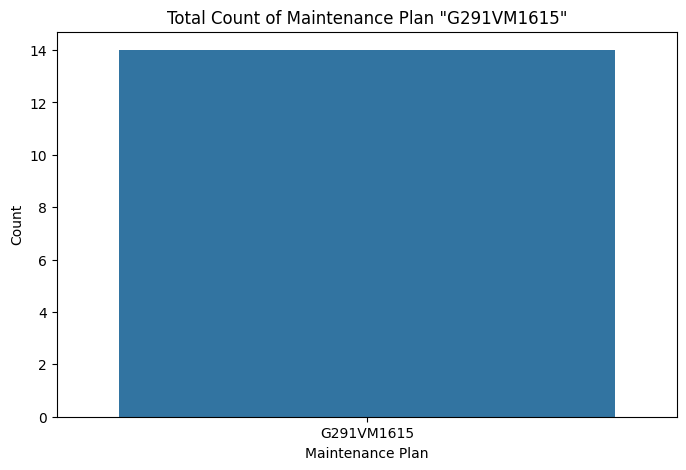

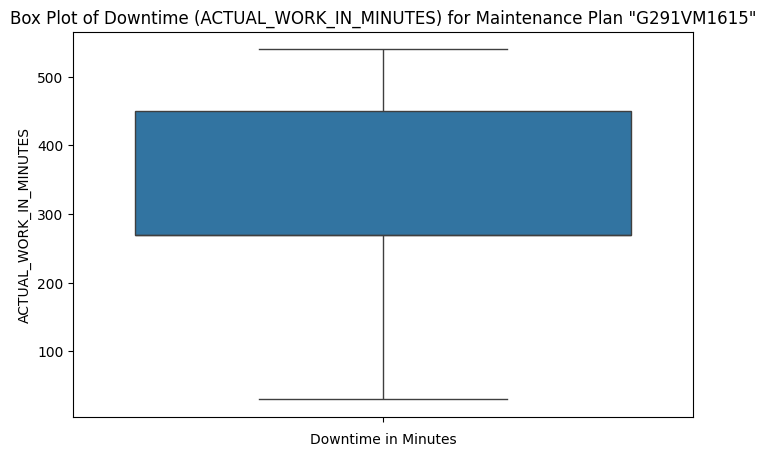

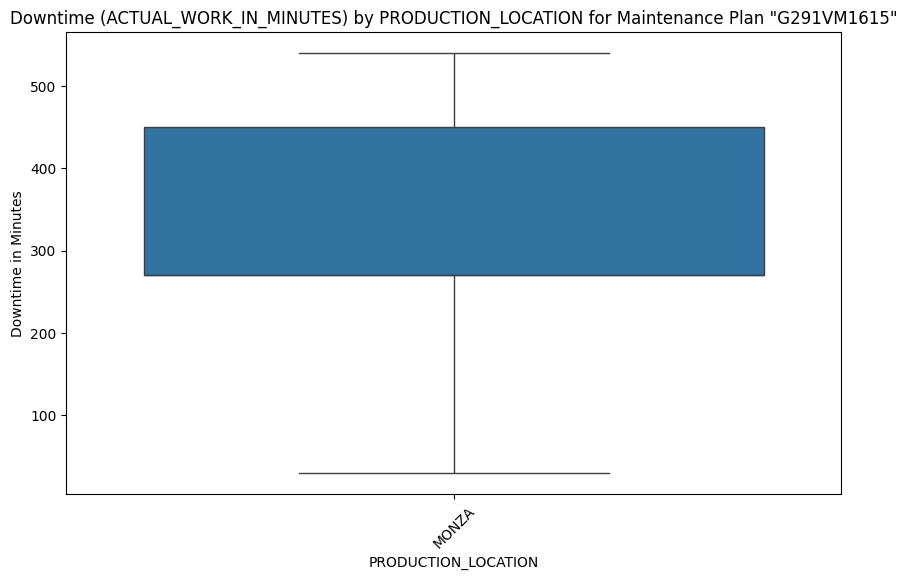

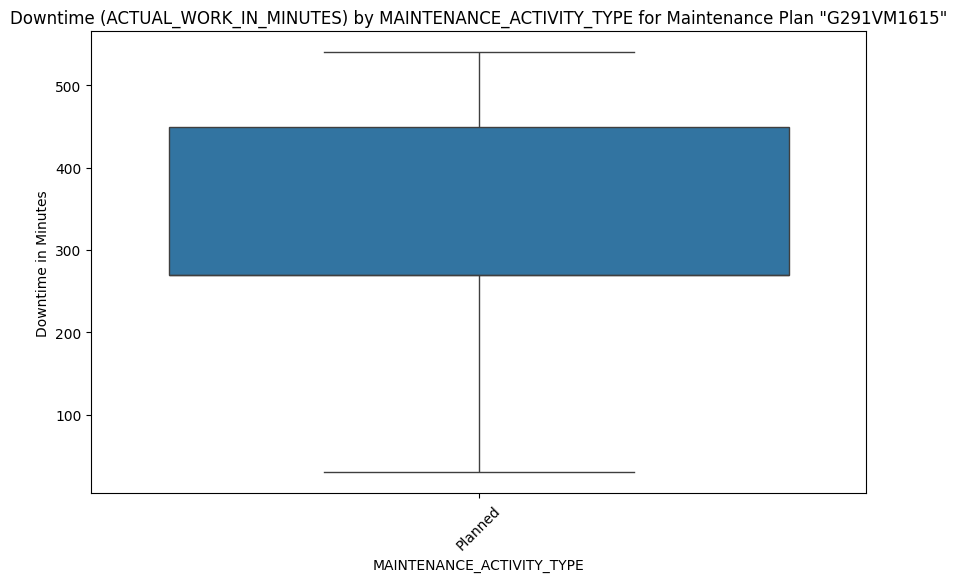

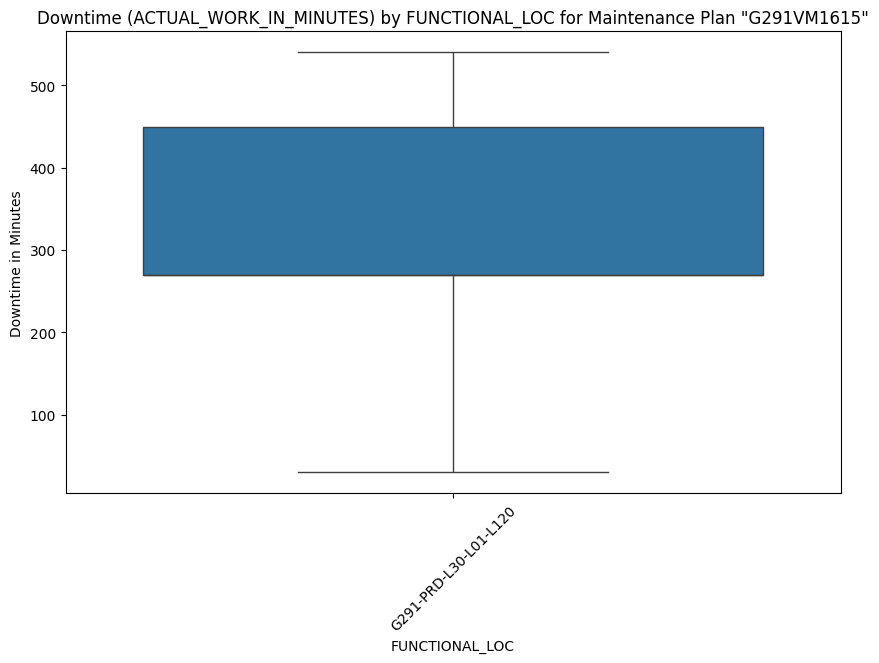

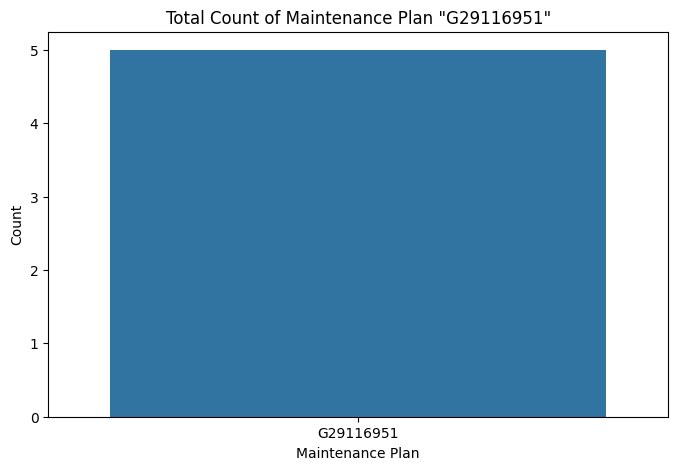

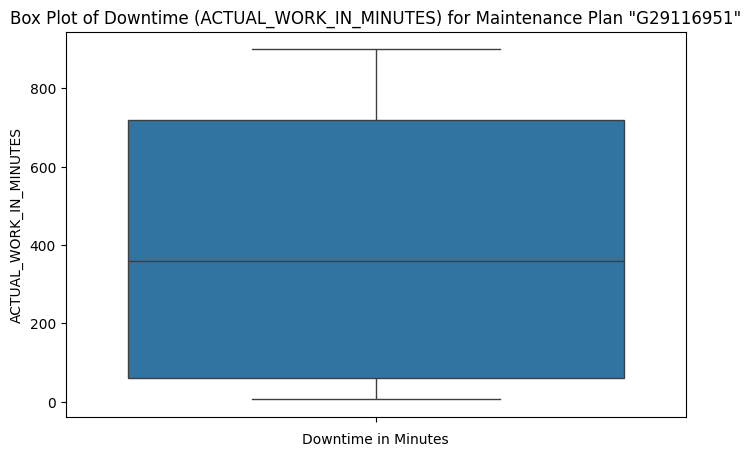

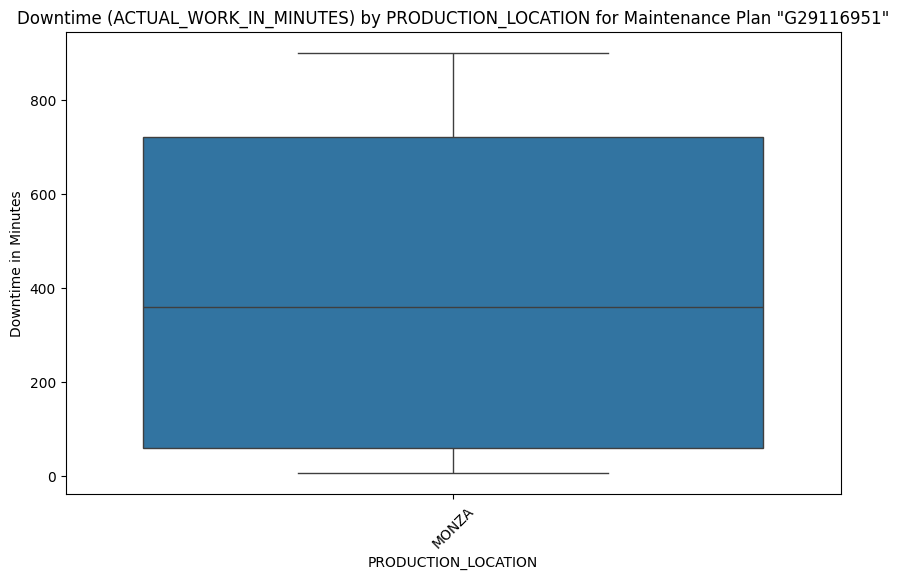

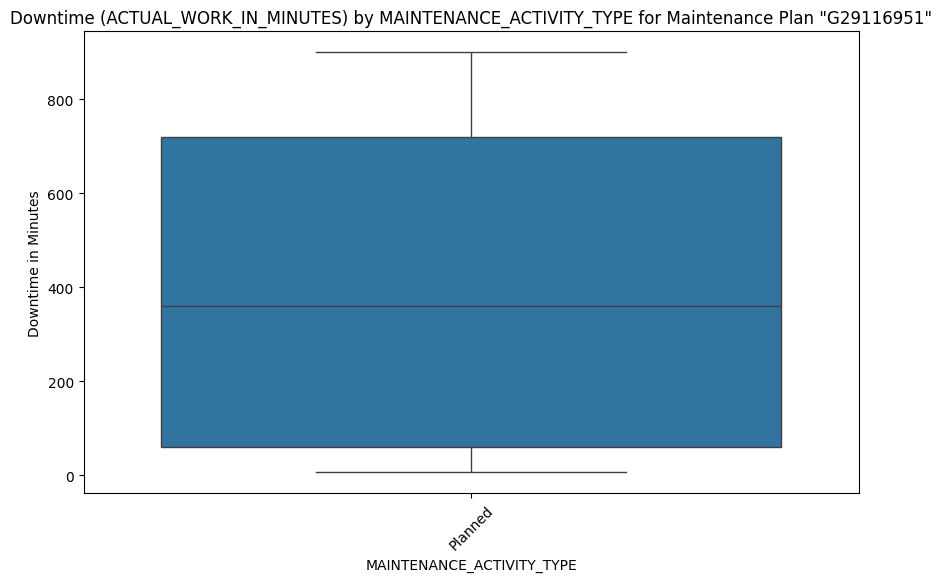

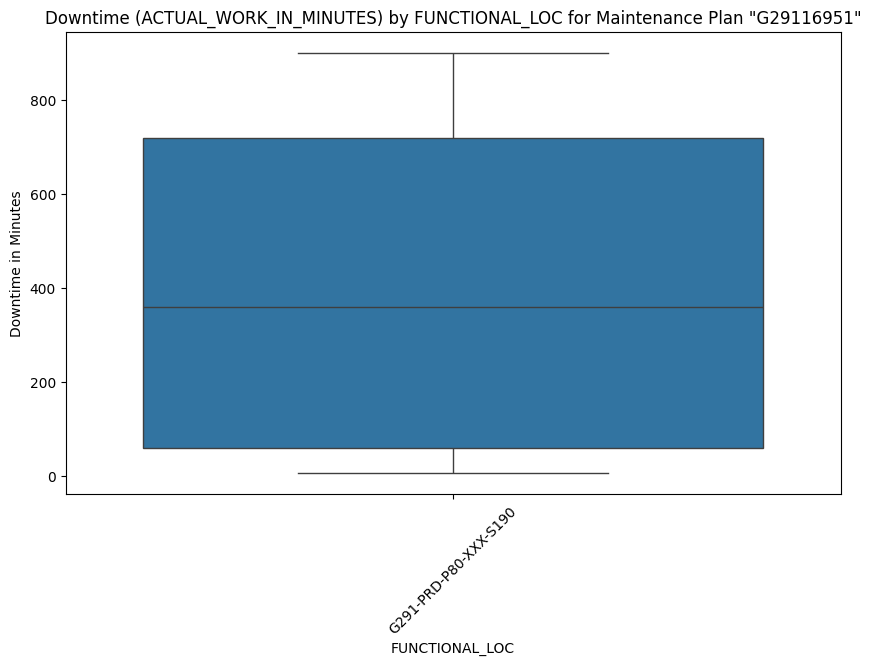

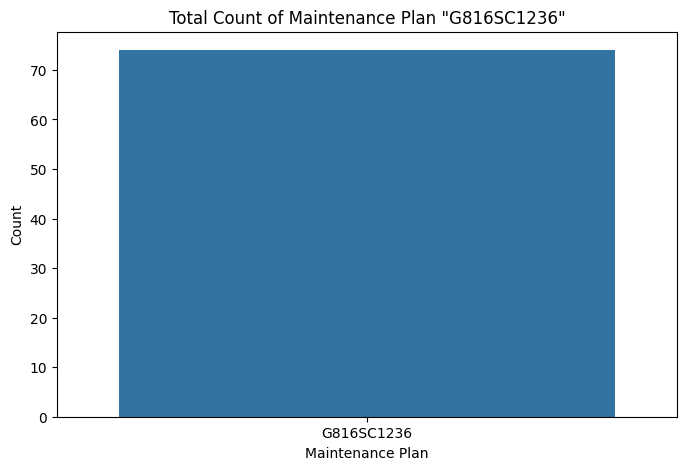

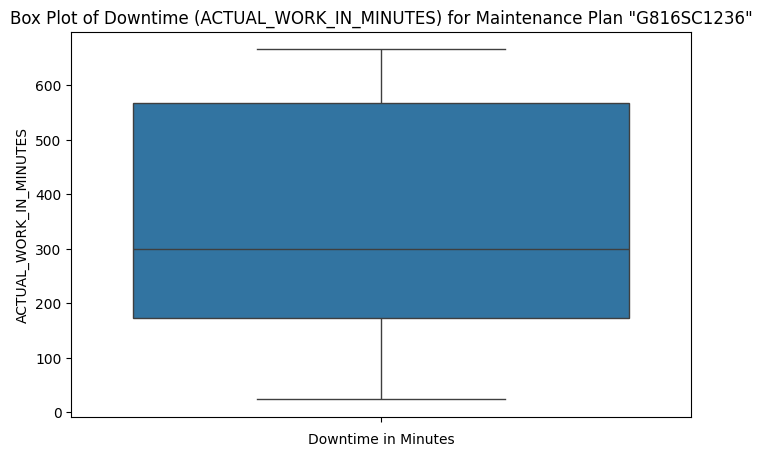

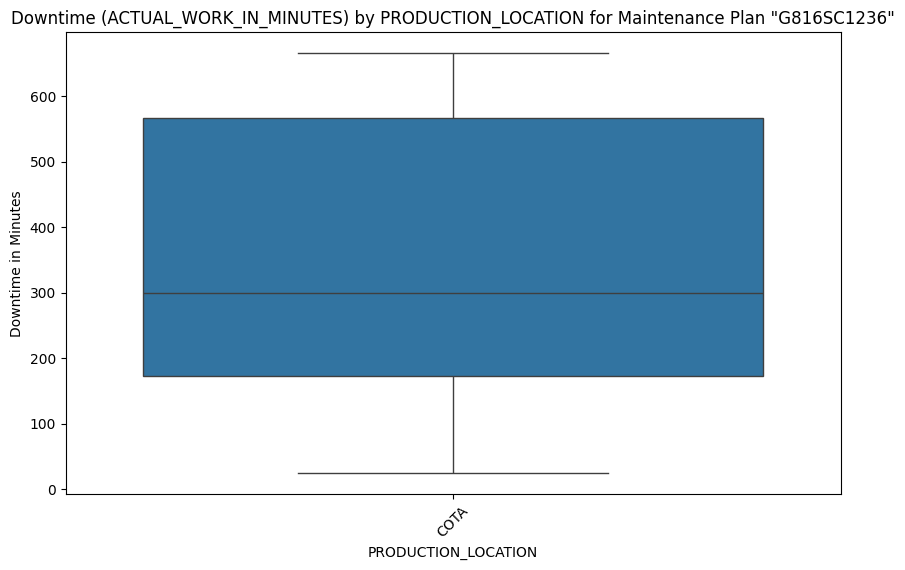

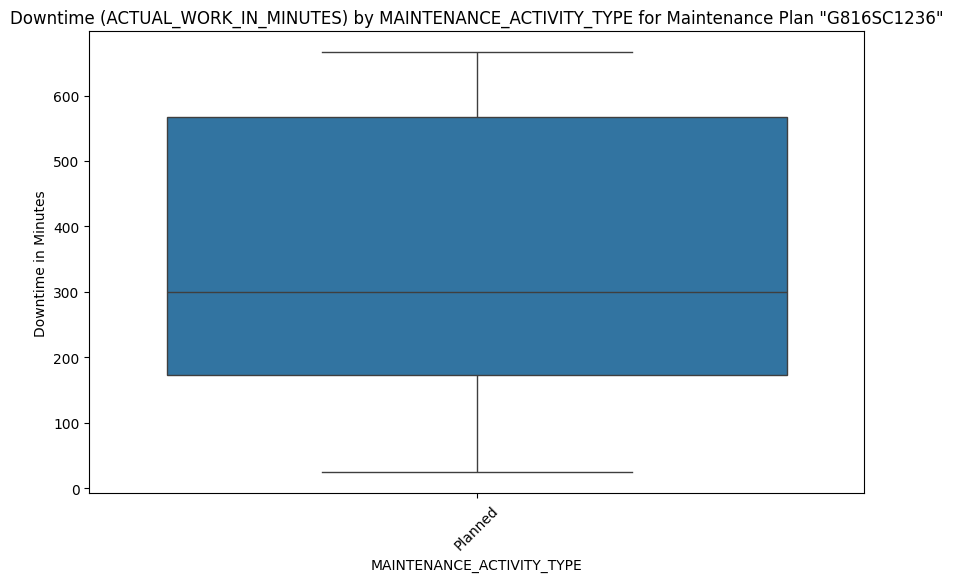

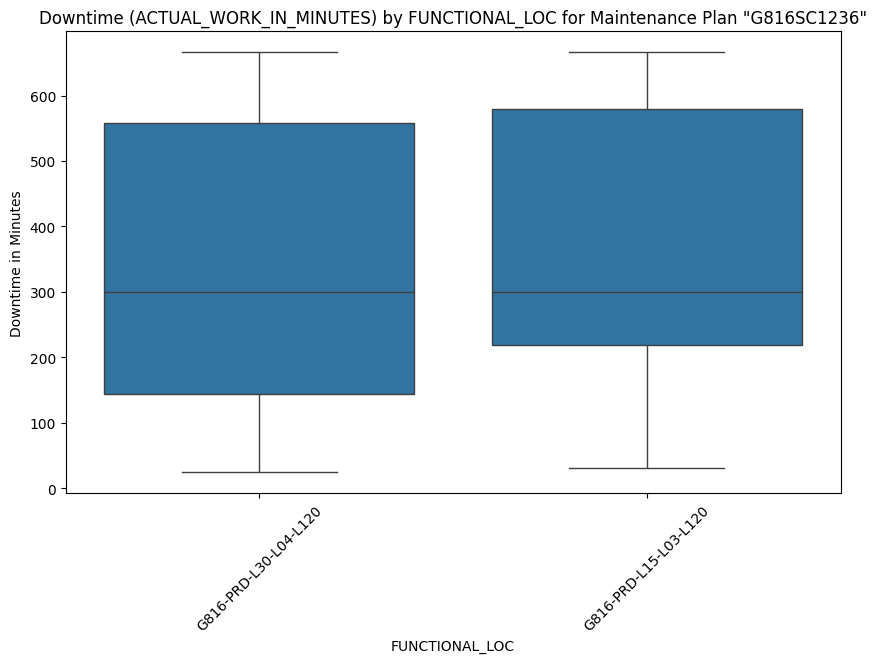

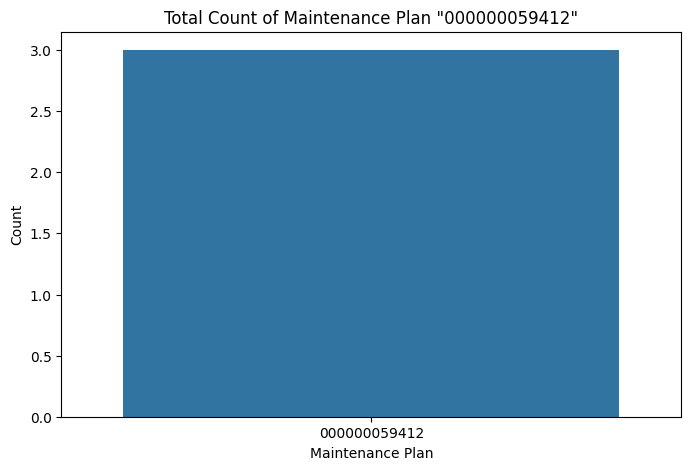

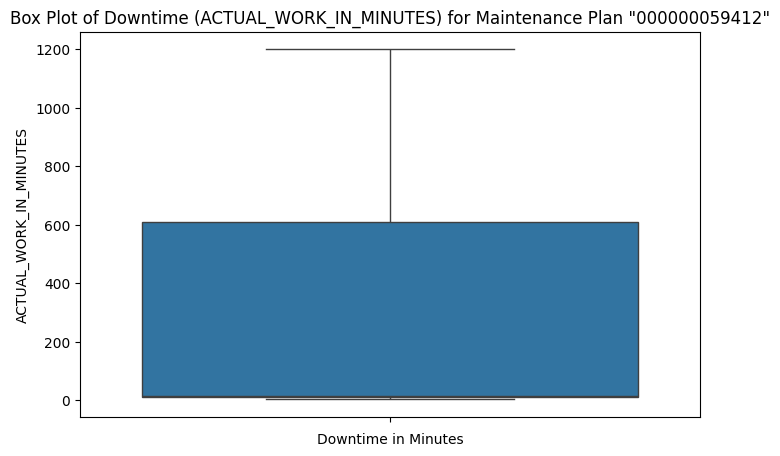

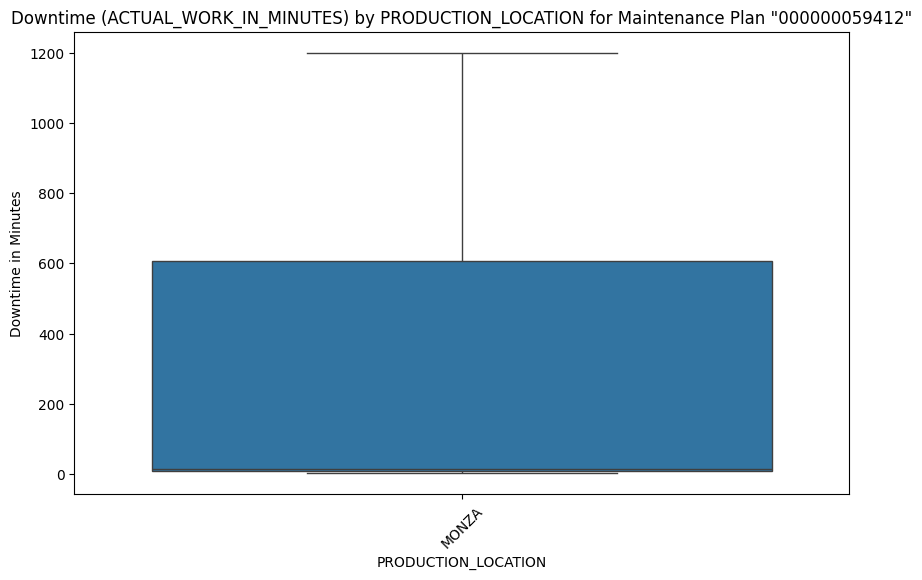

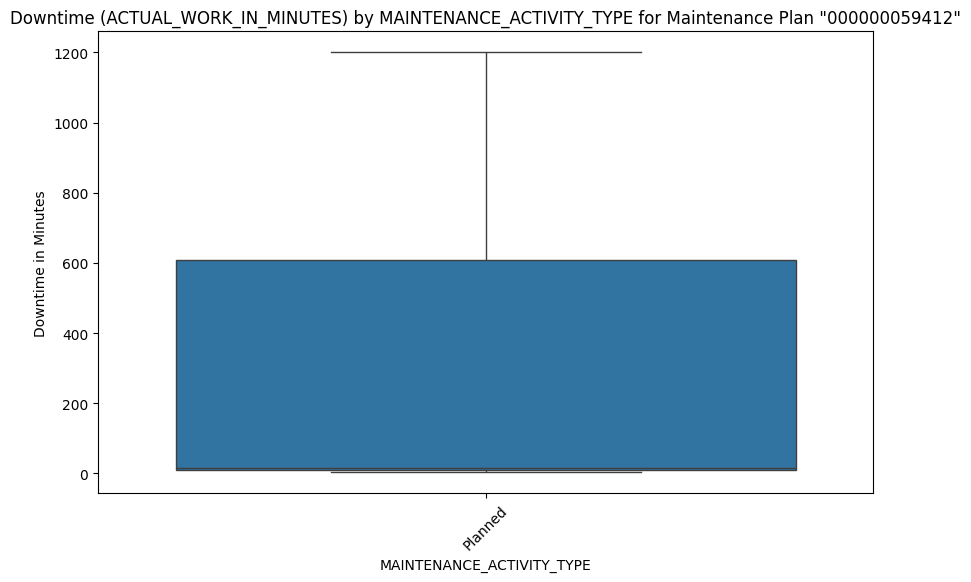

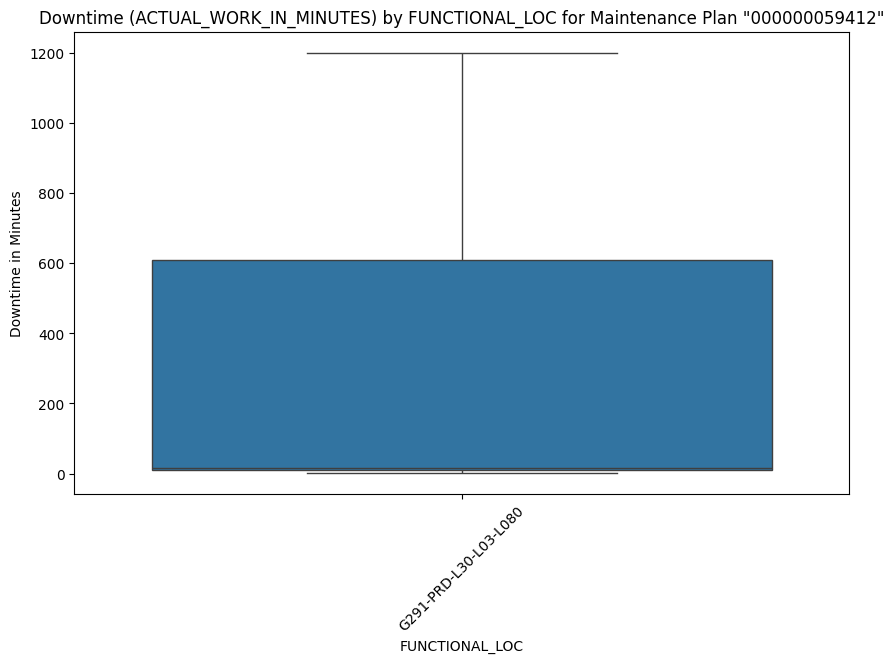

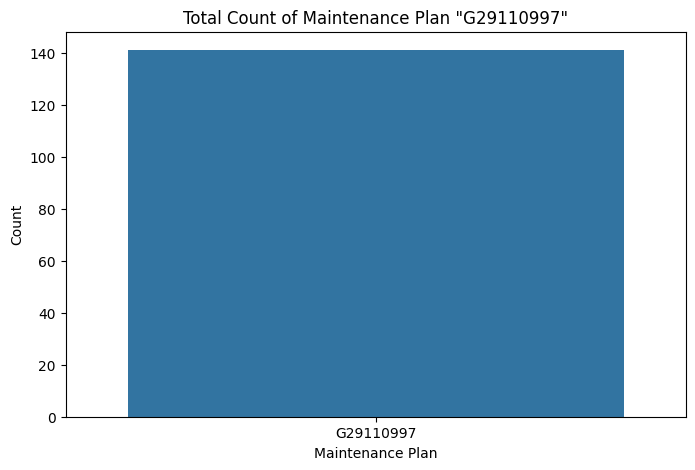

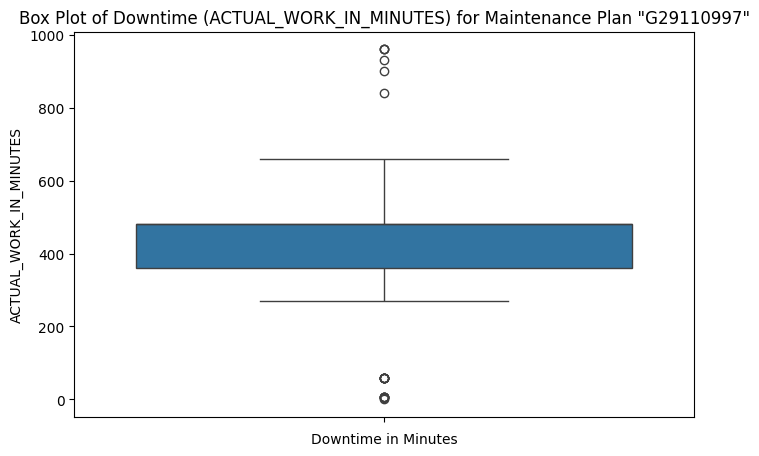

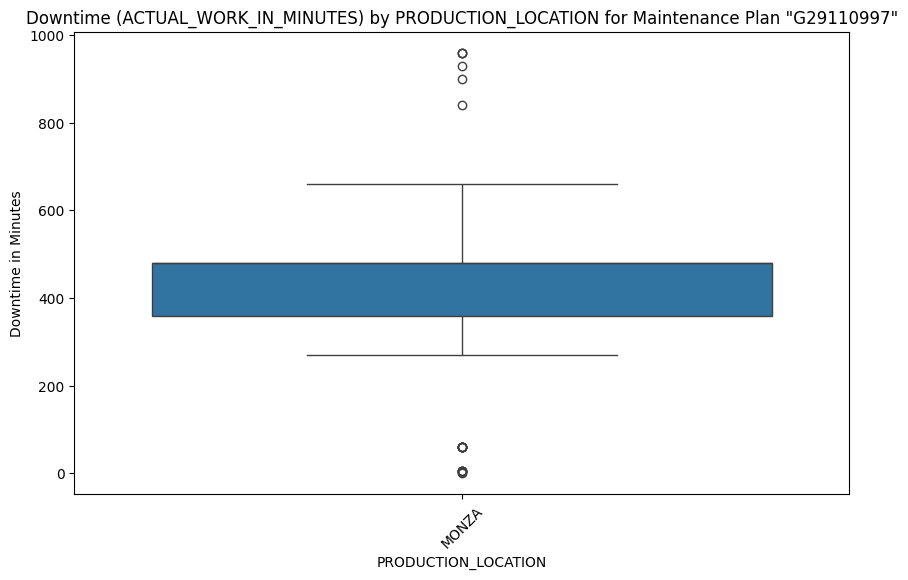

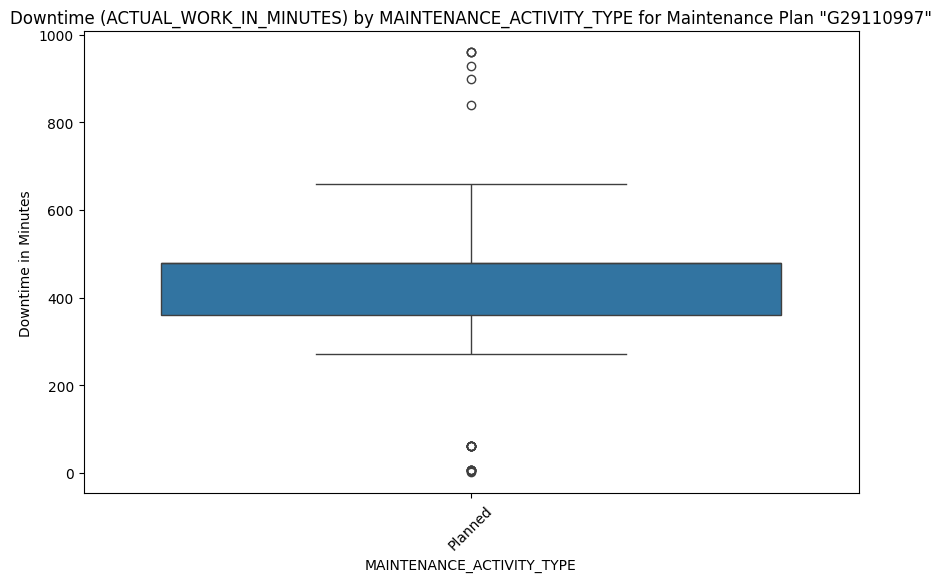

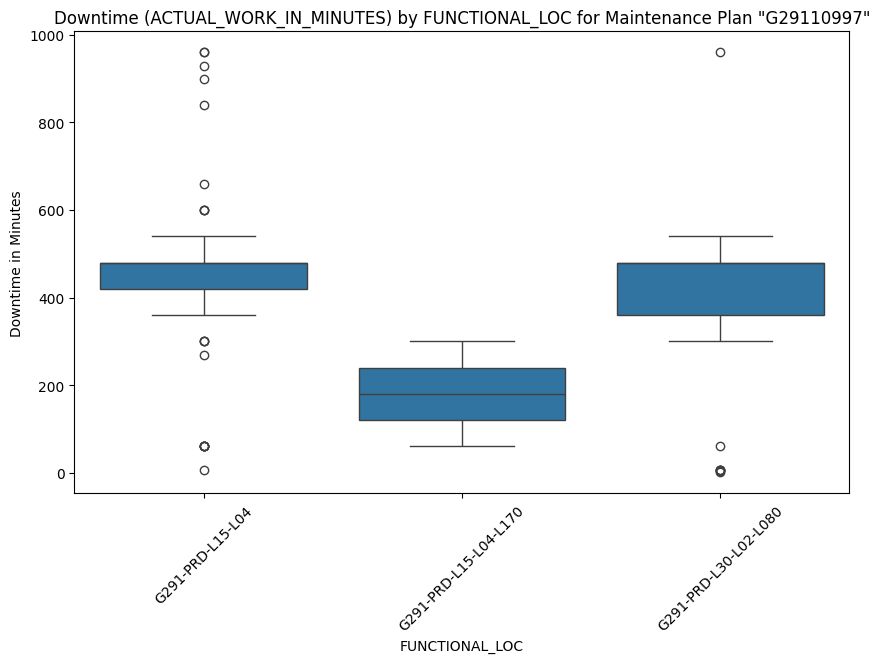

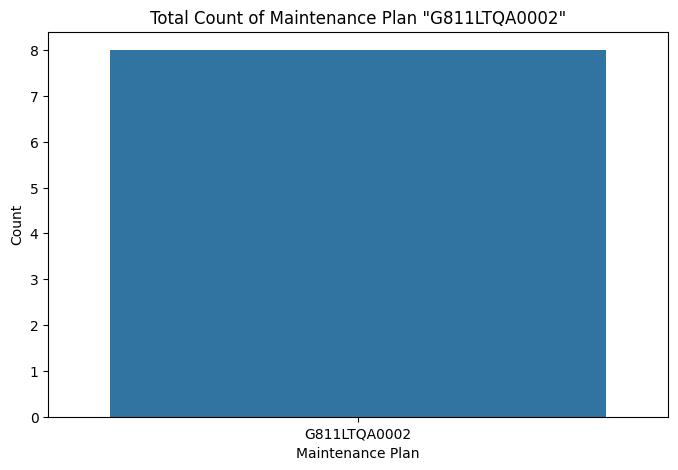

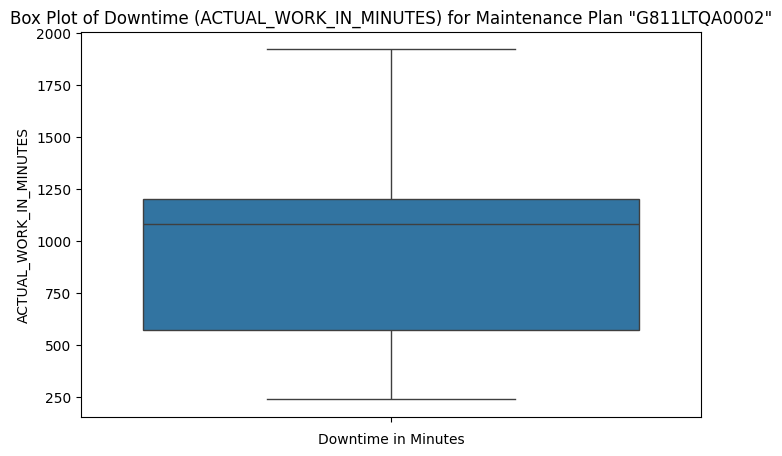

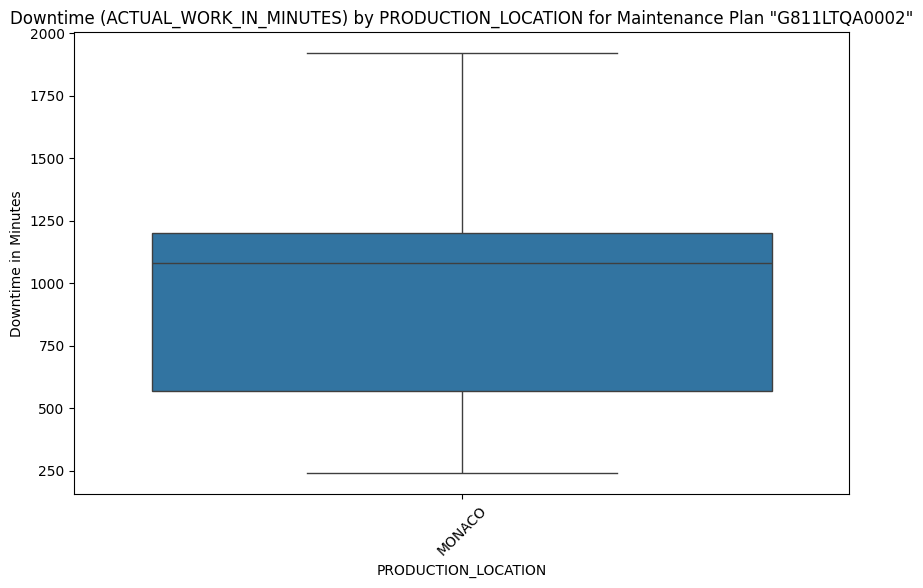

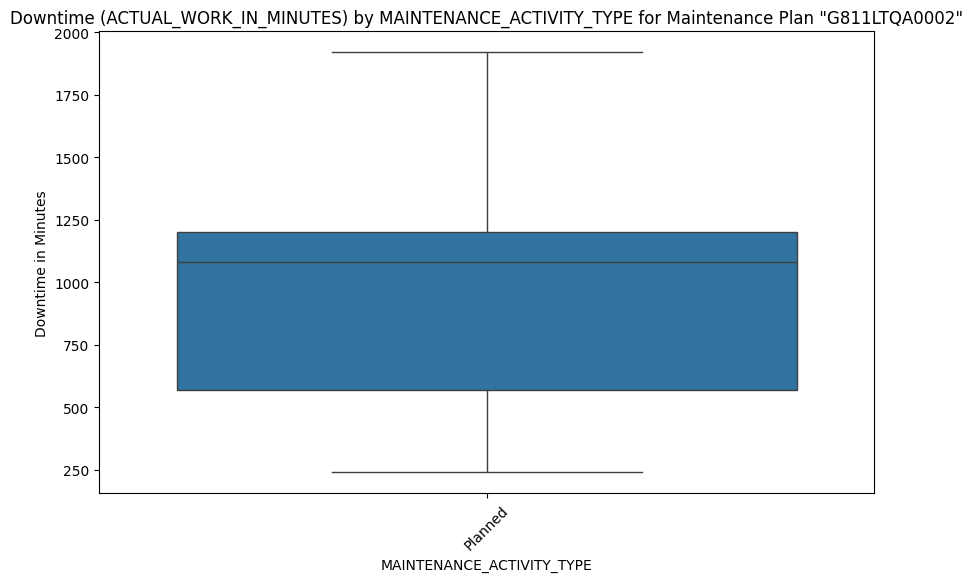

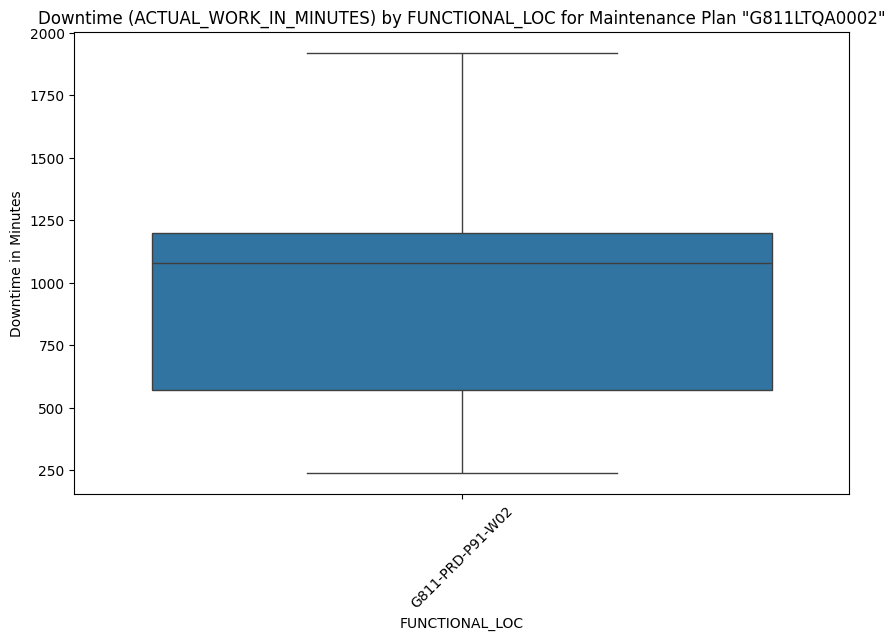

In [8]:
# List of important MAINTENANCE_PLAN values based on the lasso model
important_maintenance_plans = [
    "G291VM1615",
    "G29116951",
    "G816SC1236",
    "000000059412",
    "G29110997",
    "G811LTQA0002"
]

# Columns to analyze against each MAINTENANCE_PLAN
columns_to_compare = ['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE', 'FUNCTIONAL_LOC']

# Loop through each important MAINTENANCE_PLAN
for plan in important_maintenance_plans:
    df_plan = df_filtered_lasso[df_filtered_lasso['MAINTENANCE_PLAN'] == plan]
    
    # Plotting the count of the specific MAINTENANCE_PLAN
    plt.figure(figsize=(8, 5))
    sns.countplot(x='MAINTENANCE_PLAN', data=df_plan)
    plt.title(f'Total Count of Maintenance Plan "{plan}"')
    plt.xlabel('Maintenance Plan')
    plt.ylabel('Count')
    plt.show()

    # Plotting downtime (ACTUAL_WORK_IN_MINUTES) for the specific MAINTENANCE_PLAN
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_plan['ACTUAL_WORK_IN_MINUTES'])
    plt.title(f'Box Plot of Downtime (ACTUAL_WORK_IN_MINUTES) for Maintenance Plan "{plan}"')
    plt.xlabel('Downtime in Minutes')
    plt.show()

    # Loop through other columns to create box plots for each
    for col in columns_to_compare:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='ACTUAL_WORK_IN_MINUTES', data=df_plan)
        plt.title(f'Downtime (ACTUAL_WORK_IN_MINUTES) by {col} for Maintenance Plan "{plan}"')
        plt.xlabel(col)
        plt.ylabel('Downtime in Minutes')
        plt.xticks(rotation=45)
        plt.show()
